# DAML 07 - Naive Bayes

Michal Grochmal <michal.grochmal@city.ac.uk>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix

In [3]:
newsgroups = [
    'comp.graphics',
    'comp.windows.x',
    'misc.forsale',
    'rec.autos',
    'rec.sport.hockey',
    'sci.med',
    'sci.space',
    'soc.religion.christian',
    'talk.politics.misc',
]
train = fetch_20newsgroups(categories=newsgroups, subset='train')
test = fetch_20newsgroups(categories=newsgroups, subset='test')
train.target_names

['comp.graphics',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.sport.hockey',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.misc']

In [4]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train.data, train.target)
labels = model.predict(test.data)

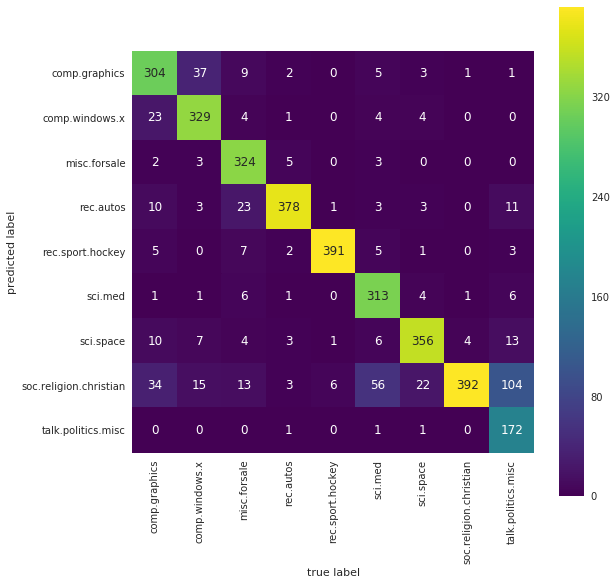

In [5]:
mat = confusion_matrix(test.target, labels)
fig = plt.figure(figsize=(9, 9))
ax = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap='viridis',
                 xticklabels=train.target_names, yticklabels=train.target_names)
ax.set_xlabel('true label')
ax.set_ylabel('predicted label');

In [6]:
def predict_chat(sentence):
    predicted = model.predict([sentence])
    return train.target_names[predicted[0]]


print('TUNING', predict_chat("I've added a new set of cyllinders, now I'm not even making 10 miles per galon"))
print('BALL', predict_chat('The ball never went even close to the goal'))
print('BUTTON', predict_chat("Dude, I'm telling you, there is no such button on my screen"))
print('WIFE', predict_chat('My wife went shopping in the morning, has not come back yet'))
print('PRESCRIPTION', predict_chat('Got my prescription rejected at the pharmacy'))
print('APOLLO', predict_chat('No one ever landed on the moon, it was all a farse'))

TUNING rec.autos
BALL rec.sport.hockey
BUTTON comp.windows.x
WIFE soc.religion.christian
PRESCRIPTION sci.med
APOLLO sci.space


In [7]:
predict_chat('the what where')

'soc.religion.christian'